# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom
Lab Number: 1

# Business Understanding - 10 pts
<Describe Data Here>

# Data Understanding - 80 pts
<Use Subsections as defined below>

In [1]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# show all columns
pd.set_option('display.max_columns', None)  

In [2]:
# Load data into dataframe - Sandesh's file 1/21/20
df = pd.read_csv('C:/Users/Jayson/Downloads/us-accidents_team/EDA_Dataset.csv', low_memory=False)

In [3]:
# Drops the nulls from specific fields
df = df.dropna(subset=['Side'])

In [24]:
# Check results of dataframe load
df.shape

# view additional data set detail
print (df.dtypes)

# Finding the null values.
print(df.isnull().sum())

ID                    object
Severity             float64
Start_Date            object
Start_Time            object
End_Date              object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Side                  object
City                  object
County                object
State                 object
Zipcode              float64
Country               object
AirportCode           object
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
PointofInterest       object
Bump                  object
Crossing              object
Yield                 object
Junction              object
No_Exit               object
Railway               object
Roundabout            object
Station               object
Stop                  object
Traffic_Calming       object
Traffic_Signal

In [23]:
df.head()

,ID,Severity,Start_Date,Start_Time,End_Date,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,County,State,Zipcode,Country,AirportCode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,PointofInterest,Bump,Crossing,Yield,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3.0,2016-02-08,05:46:00,2016-02-08,11:00:00,39.865147,-84.058723,0.01,R,Dayton,Montgomery,OH,45424.0,US,FFO,36.9,91.0,29.68,10.0,0.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,A-2,2.0,2016-02-08,06:07:59,2016-02-08,06:37:59,39.928059,-82.831184,0.01,L,Reynoldsburg,Franklin,OH,43068.0,US,CMH,37.9,100.0,29.65,10.0,0.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,A-3,2.0,2016-02-08,06:49:27,2016-02-08,07:19:27,39.063148,-84.032608,0.01,R,Williamsburg,Clermont,OH,45176.0,US,I69,36.0,100.0,29.67,10.0,3.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
3,A-4,3.0,2016-02-08,07:23:34,2016-02-08,07:53:34,39.747753,-84.205582,0.01,R,Dayton,Montgomery,OH,45417.0,US,DAY,35.1,96.0,29.64,9.0,4.6,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,A-5,2.0,2016-02-08,07:39:07,2016-02-08,08:09:07,39.627781,-84.188354,0.01,R,Dayton,Montgomery,OH,45459.0,US,MGY,36.0,89.0,29.65,6.0,3.5,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day


In [37]:
# Dropping: 
# can use zip code and other location identifers - State, County, and Country are clean
# weather_condition explains the weather at the time of accident; wind_speed is heavy in nulls
# source of the data and ID likely not needed
# dropping twilight measures except for sunrise_sunset; all are similar; dropping end time (we have start)
# dropping TMC because while it's informative, 500K nulls
#df = df.drop(['Number', 'Street', 'Start_Lat', 'Start_Lng', 'End_Lng', 'End_Lat', 'Airport_Code', 'End_Lng'
             # , 'Zipcode', 'City'
        # , 'Wind_Chill(F)', 'Precipitation(in)', 'Pressure(in)', 'Humidity(%)', 'Weather_Timestamp'
           # , 'Wind_Speed(mph)', 'Wind_Direction'
        # , 'Source'
        # , 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'End_Time', 'Timezone'
       #  , 'TMC']
#, axis=1)

In [4]:
df.shape

(2261741, 37)

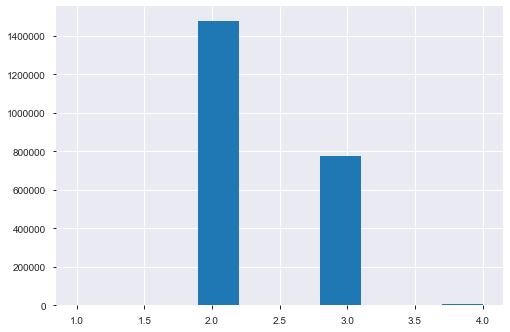

In [5]:
# unique values severity
df['Severity'].hist()

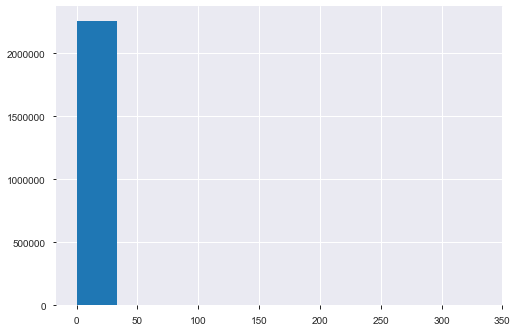

In [6]:
# unique values distance
df['Distance(mi)'].hist()

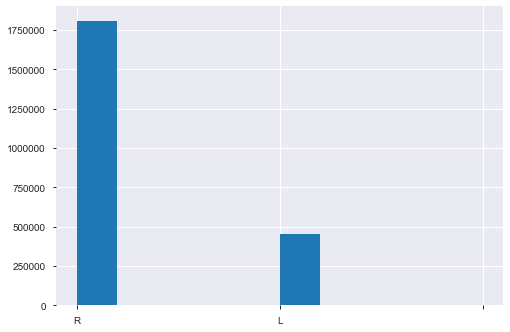

In [7]:
# unique values side
df['Side'].hist()

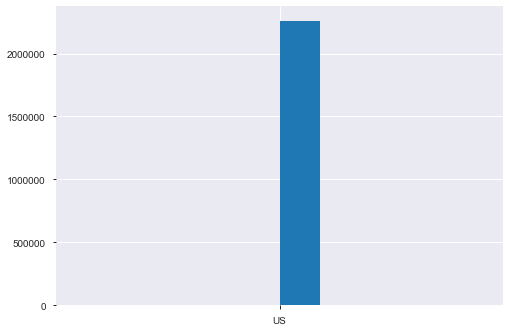

In [8]:
# unique values country
df['Country'].hist()

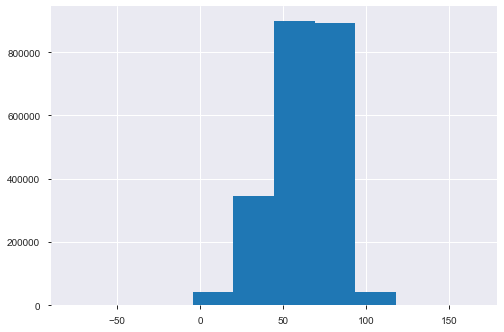

In [9]:
# unique values Temperature(F)
df['Temperature(F)'].hist()

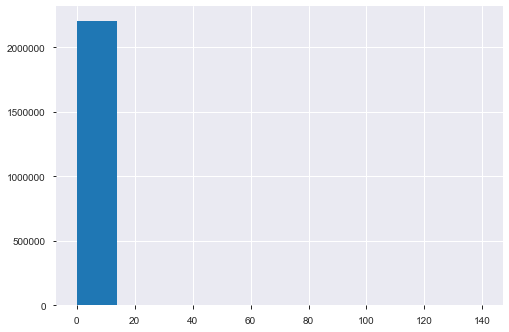

In [10]:
# unique values visibility
df['Visibility(mi)'].hist()

In [23]:
# Finding the null values.
print(df.isnull().sum())

ID                       0
Severity                 2
Start_Date               2
Start_Time               2
End_Date                 2
End_Time                 2
Start_Lat                2
Start_Lng                2
Distance(mi)             2
Side                     3
City                    48
County                   3
State                    3
Zipcode                276
Country                  3
AirportCode           3640
Temperature(F)       38279
Humidity(%)          40615
Pressure(in)         33068
Visibility(mi)       46279
Wind_Speed(mph)          2
Precipitation(in)        2
Weather_Condition    46228
PointofInterest          3
Bump                     3
Crossing                 3
Yield                    3
Junction                 3
No_Exit                  3
Railway                  3
Roundabout               3
Station                  3
Stop                     3
Traffic_Calming          3
Traffic_Signal           3
Turning_Loop             3
Sunrise_Sunset          54
d

In [12]:
# Split dataset into test and train

train = df.sample(frac=0.7,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [13]:
# Check results of test split
test.shape

(678522, 37)

In [5]:
# subset columns for scatter plot - continuous

df_cont = df[['Severity','Start_Date','Start_Time','End_Date','End_Time','Start_Lat','Start_Lng'
              ,'Distance(mi)','Side','City','County','State','Zipcode','Country','AirportCode'
              ,'Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)'
              ,'Precipitation(in)','Weather_Condition','Sunrise_Sunset']]

F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


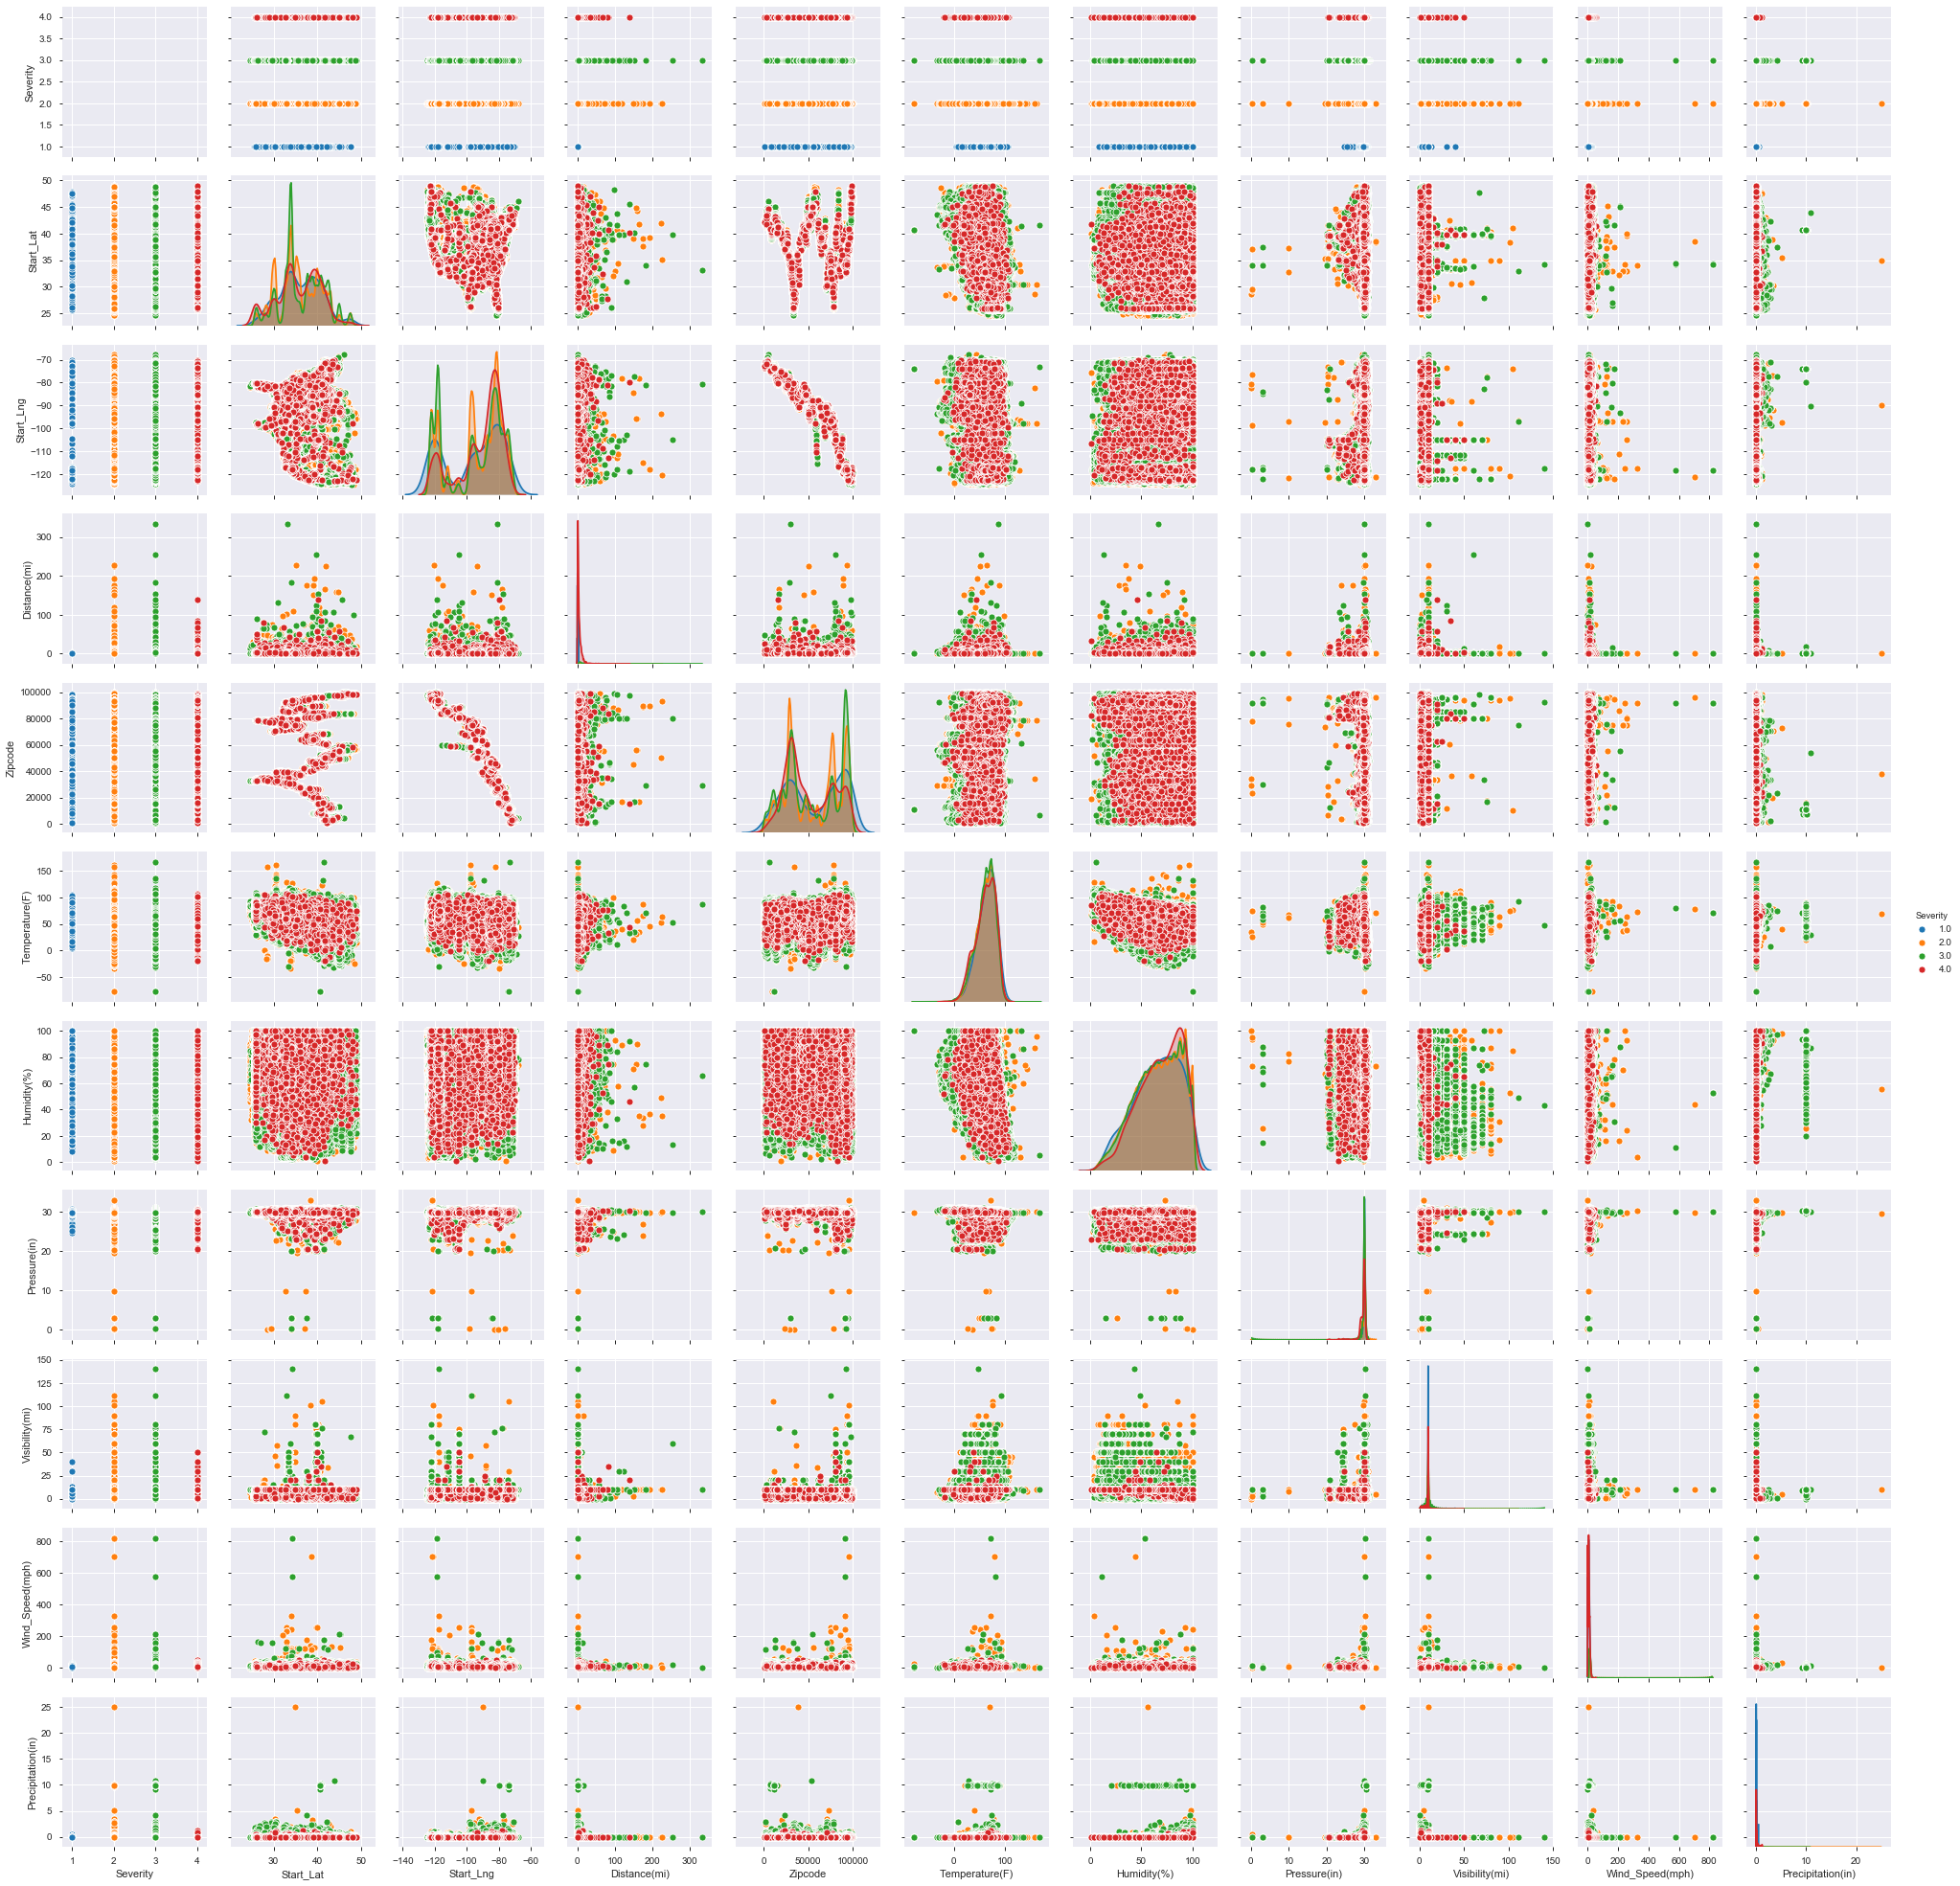

In [28]:
# scatterplot matrix for continuous columns

sns.pairplot(df_cont, hue="Severity")

In [121]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

### Distance versus Temperature:

Most of the observed accidents occur when distances are low and temperature is within the range of 0 to 100 degrees Farenheit. It goes without saying that this temperature range is 1) very wide, and 2) encompasses the "normal" range of temperatures within the U.S. 

Interestingly, we do observe a slightly higher incidence of the most severe accidents within the range of 0 to approximately 40 degrees, possibly attributable to freezing conditions such as ice and/or snow. It will be interesting to correlate this finding alongside our weather description field to see if we observe higher severe accidents when these conditions are present. 

Additionally if we look at the distance axis with the most severe accidents in mind, a pattern starts to emerge that the most severe accidents generally occur under 50 miles distance.

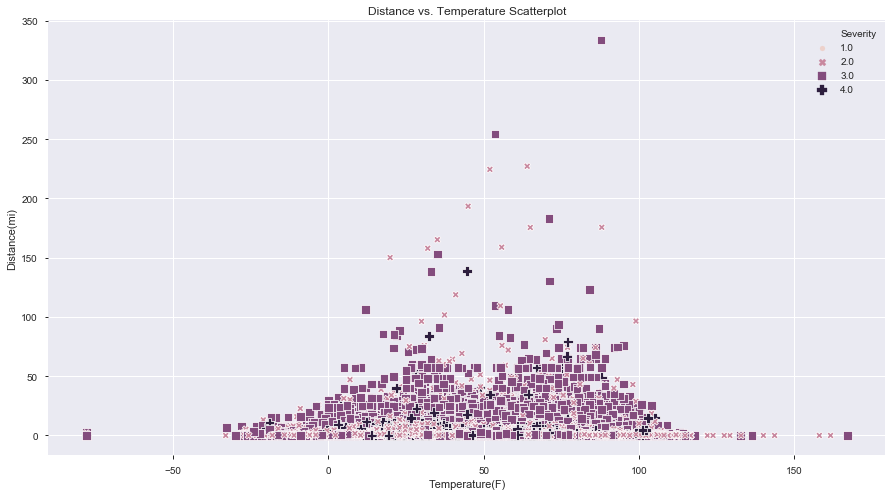

In [122]:
#Scatter plot - Temp vs. Distance

plt.title('Distance vs. Temperature Scatterplot')
sns.scatterplot(x='Temperature(F)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

### Distance versus Visibility:

When visibility is lowest, we see larger distances driven and a higher frequency of accidents. It follows that the reduced visibility then may be partly to blame for the higher accident rate we've observed. The severity of these accidents are also a mixed bag - from least severe to most severe.

Conversely, when visibility increases, we see distances decrease. We also see less severe accidents occuring, save for a handful of severity level 3 accidents around the 110 mile mark. Higher visibility then appears to have some correlation with a lower accident rate.

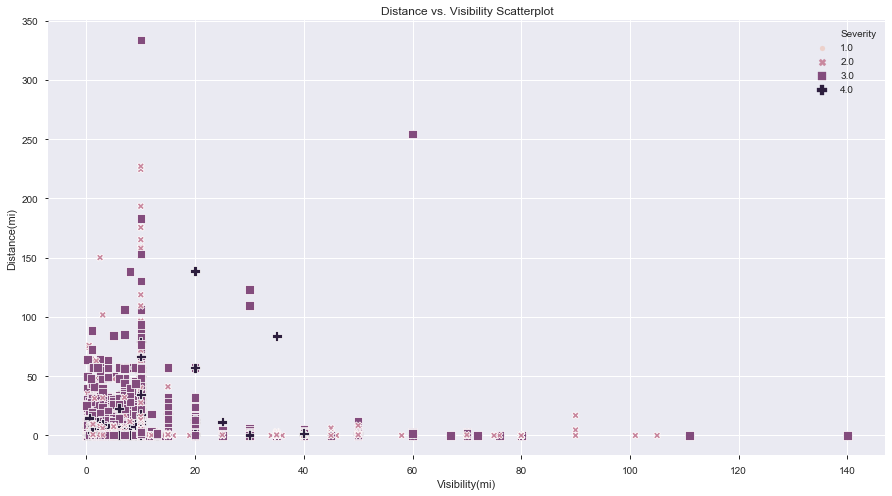

In [123]:
# Scatter plot - Visibility vs. Temperature

plt.title('Distance vs. Visibility Scatterplot')
sns.scatterplot(x='Visibility(mi)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

### Visibility vs. Temperature:

As with our previous observations, most accidents tend to occur when lower visibility conditions are present. As visibility conditions improve, both the accident rate and severity of those accidents appears to also improve. 

If we layer temperature into the plot alongside visibility, there does not appear to be a clear impact temperature has alongside visibility with respect to accident rate or severity.

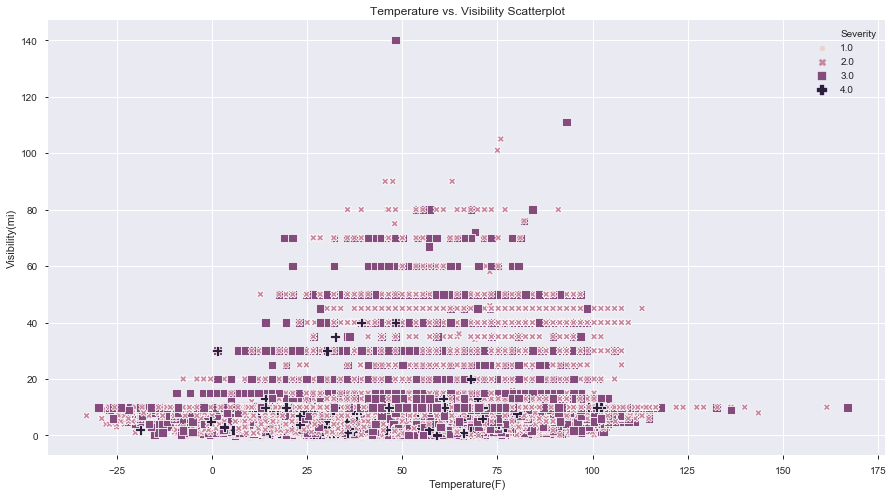

In [124]:
#Scatter plot - Temperature vs. Visibility

plt.title('Temperature vs. Visibility Scatterplot')
sns.scatterplot(x='Temperature(F)', y='Visibility(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Precipitation versus Visibility

Most accidents appear to cluster between 0 and 5 inches of precipitation and lower levels of visibility. 

As we saw in previous scatterplots, as visibility increases, the accident rate tends to decrease. As precipitation increases however, accident frequency also increases but to a point (approximately at 5 inches of precipitation - and again around 10 inches). There appears to be a gap between 5 and 10 inches of precipitation at lower visibility levels. There is also a clustering of accidents right around the 10 inch precipitation mark with lower visibility associated as well. 

As with our previous visibility scatterplot, the most severe accidents appear to occur at lower levels of visibility 

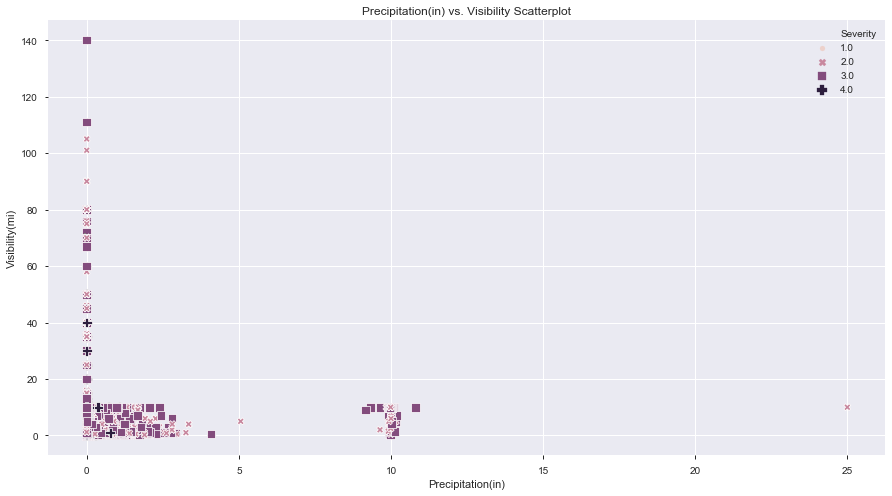

In [125]:
#Scatter plot - Precipitation vs. Visibility

plt.title('Precipitation(in) vs. Visibility Scatterplot')
sns.scatterplot(x='Precipitation(in)', y='Visibility(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Precipitation versus Distance

As precipitation increases, distance does not appear to follow. In fact, most accidents tend to occur within relatively small distances and low precipitation, save for one cluster of accidents that occur when precipitation reaches 10 inches - with distance still remaining relatively low. 

At lower levels of precipitation however, we observe crashes occuring at longer distances - likely attributable to more driving activity when conditions are better. The most severe accidents tend to occur within 50 miles and with 0 - 4 inches of precipitation.

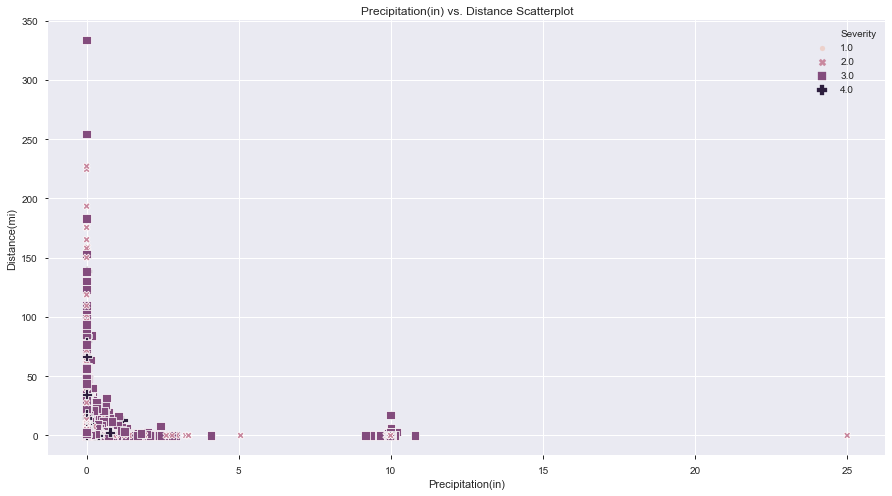

In [126]:
#Scatter plot - Precipitation vs. Distance

plt.title('Precipitation(in) vs. Distance Scatterplot')
sns.scatterplot(x='Precipitation(in)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Visibility versus Distance

As visibility increases, distance driven does as well - to a point. At around the 15 miles of visibility marker, distance driven tends to decrease. What we may be seeing here is that visibility past a certain point - say 15-20 miles, makes no difference to the everyday driver in terms of the distance they cover as either of those conditions present excellent driving conditions. 

What is interesting is the 0-15 mile visibility range; we see accidents steadily increase as we approach the 15 mile visibility mark. This increase parallels the distance increase as well - potentially indicating that as visibility conditions improve up to around 15 miles of visibility, so too does the distance driven and the associated increase in accidents.

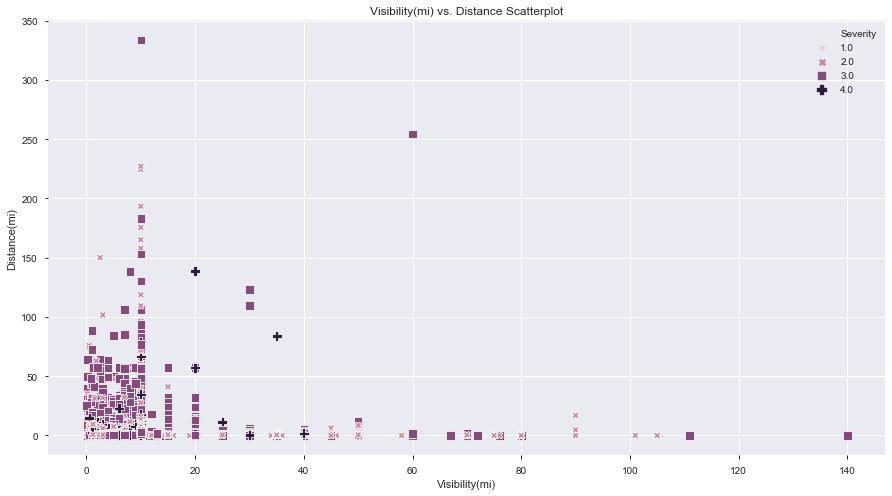

In [127]:
#Scatter plot - Visibility vs. Distance

plt.title('Visibility(mi) vs. Distance Scatterplot')
sns.scatterplot(x='Visibility(mi)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Pressure versus Distance

When pressure is highest, driving distance seems to also be highest - potentially indicating that folks drive further when higher pressure systems exist (usually resulting in clearer driving weather). 

We also see a clustering of accidents on the lower side of the pressure range with a lower distance as well - indicating potentially that when pressure is low (as it usually is in storm conditions), people generally drive less. Whatsmore, there appears to be a clustering of more severe accidents in this space potentially due to weather.

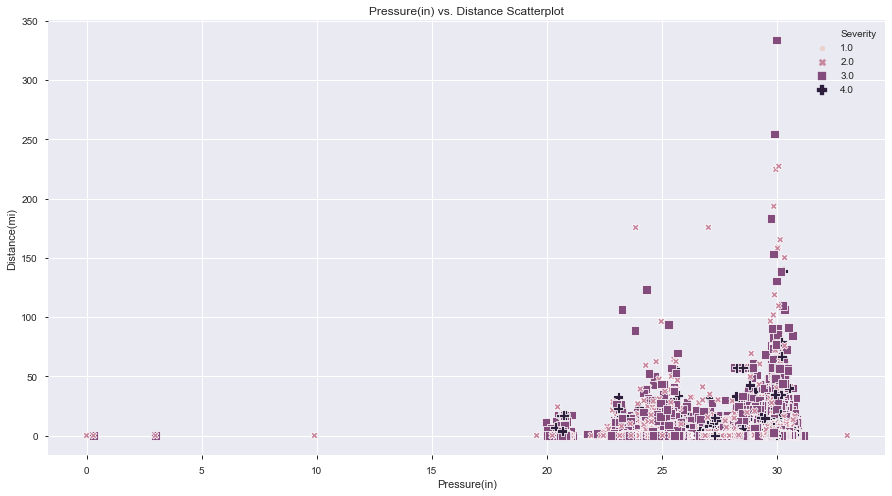

In [128]:
#Scatter plot - Pressure vs. Distance

plt.title('Pressure(in) vs. Distance Scatterplot')
sns.scatterplot(x='Pressure(in)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Humidity vs. Distance

There doesn't appear to be any strong correlation or insight from the combination of humidity, distance, and accident severity.

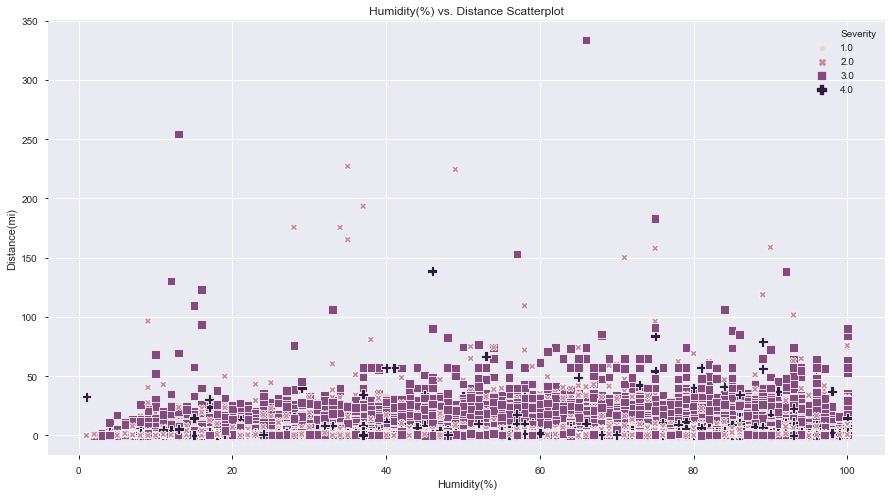

In [129]:
#Scatter plot - Humidity vs. Distance

plt.title('Humidity(%) vs. Distance Scatterplot')
sns.scatterplot(x='Humidity(%)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Humidity vs. Temperature

There's a clear association between rising temperature and falling humidity; said another way, as humidity increases temperature seems to decrease which possibly indicates the relationship between higher temperature and lower humidity. This is likely more of a weather-related effect / relationship than any specific finding with the accident data. 

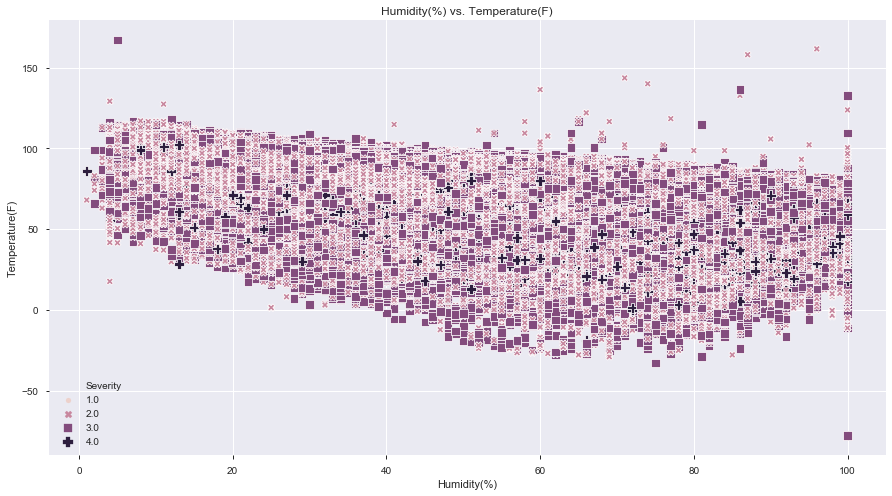

In [133]:
#Scatter plot - Humidity(%) vs. Temperature(F)

plt.title('Humidity(%) vs. Temperature(F)')
sns.scatterplot(x='Humidity(%)', y='Temperature(F)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Pressure vs. Temperature

We observe a larger range of accidents across temperature when pressure hovers around 30 inches. Higher pressure typically indicates clearer skies, so this could just be an indication that folks drive more when the weather is clearer, regardless of temperature - perhaps they can see better. 

Interestingly, we see a clustering of accidents on the lower end of pressure as well (around 0-5 in) at the ~40 to 80 degree (temperature) range. These could be possibly attributable to stormier conditions as low pressure generally induces storms. 

###  Pressure vs. Temperature



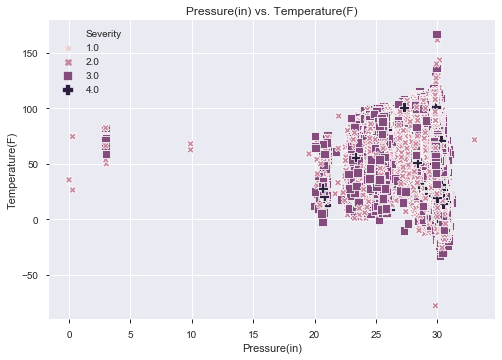

In [4]:
#Scatter plot - Pressure(in) vs. Temperature(F)

plt.title('Pressure(in) vs. Temperature(F)')
sns.scatterplot(x='Pressure(in)', y='Temperature(F)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

###  Wind Speed vs. Temperature

Most accidents seem to occur under lower windspeed conditions but to be clear, lower windspeed is relative; we suspect any wind speed values above 200 mph primarily due to the fact that the highest windspeed on earth ever recorded was 231 mph. Any accidents recorded with wind speed values above 200 mph are potential outliers and we will treat them as suspect in further analysis.  

Within the range of 0-200 mph windspeed then, we can see that accidents are more frequent under lower windspeed conditions, potentially attributable to more drivers on the road during less hazardous conditions. Factoring temperature in, we see a pattern emerge between the ~35 and 95 degree range and higher wind speed conditions. We do see less severe accidents occuring in this range as well. 

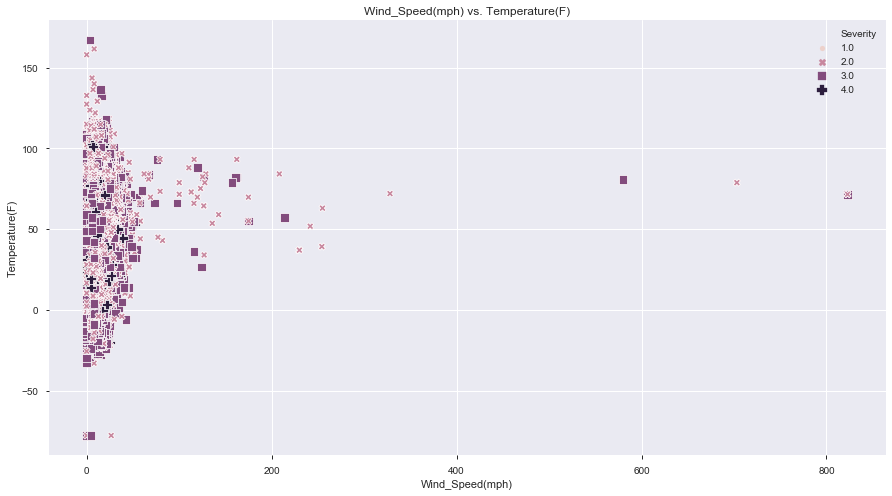

In [135]:
# Scatter plot - Wind_Speed(mph) vs. Temperature(F)

plt.title('Wind_Speed(mph) vs. Temperature(F)')
sns.scatterplot(x='Wind_Speed(mph)', y='Temperature(F)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

#  Wind Speed vs. Distance

As per the above plot, wind speed appears to contain outliers on the higher end. For this analysis, we will assume any wind speed value above 200 mph is suspect, per the highest wind speed ever on eart being recorded at 230 mph.

Within the range of 0-200 mph wind speed then, we tend to see accident frequency increase under lower windspeed conditions and higher distances driven. Conceptually this makes sense; under less hazardous conditions, folks are potentially driving further which may increase the accident rate. We also observe that the most severe accidents appear to occur with lower wind speed conditions and between 0-100 miles driven. 

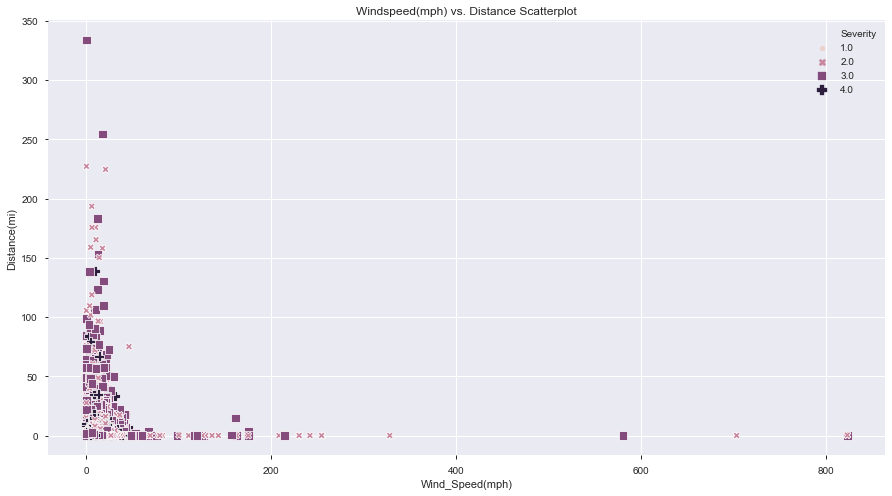

In [136]:
# Scatter plot - Windspeed vs. Distance

plt.title('Windspeed(mph) vs. Distance Scatterplot')
sns.scatterplot(x='Wind_Speed(mph)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

#  Wind Speed vs. Precipitation

As per the above plot, wind speed appears to contain outliers on the higher end. For this analysis, we will assume any wind speed value above 200 mph is suspect, per the highest wind speed ever on eart being recorded at 230 mph.

We observe two major clusters of accidents; the first occurs between 0 - ~75mph and 0-5 inches of precipitation. The second cluster appears around the 0-10 mph windspeed and 8 - 12 inches of precipitation. These two clusters likely indicate that with lower levels of precipitation, more driving - and thus more accidents occur. For the second clustering in the higher precipitation range, this may indicate a higher frequency of accidents occur with higher precipitation and milder wind speeds. We will explore this with our analysis. We see a similar effect with pressure and wind speed.


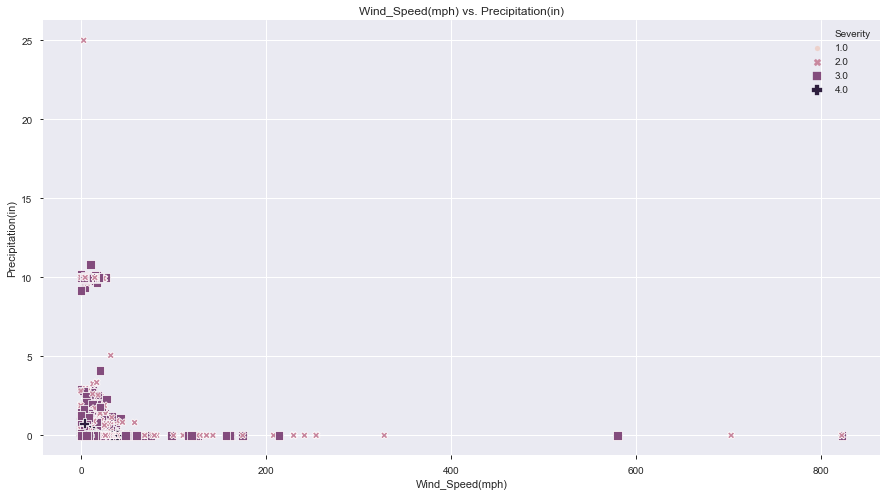

In [138]:
# Scatter plot - Wind_Speed(mph) vs. Precipitation(in)

plt.title('Wind_Speed(mph) vs. Precipitation(in)')
sns.scatterplot(x='Wind_Speed(mph)', y='Precipitation(in)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                data=df)

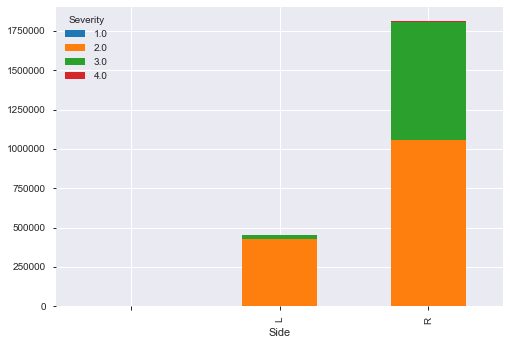

In [66]:
# Side and severity bar chart
df_bar = pd.crosstab(index=df['Side'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

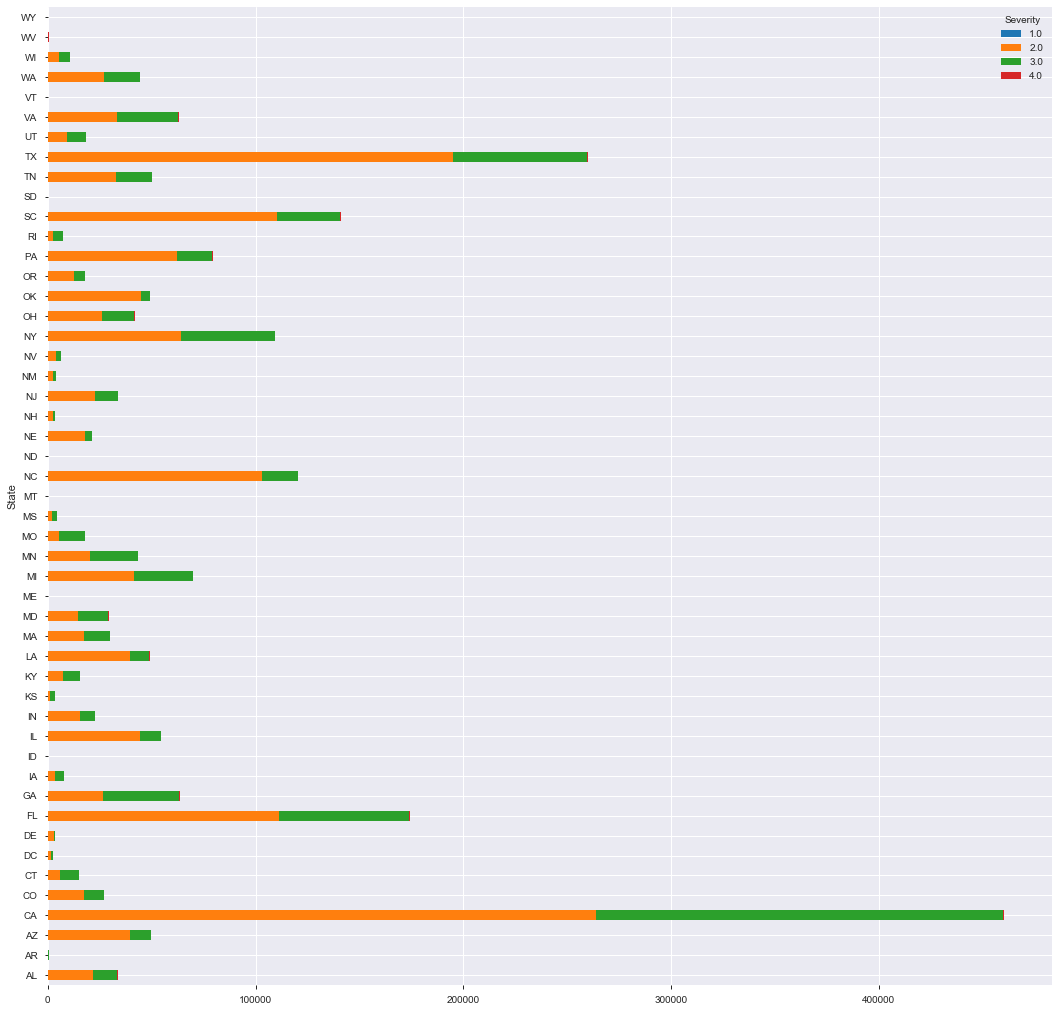

In [80]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 65em; }</style>"))

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 18]

# State and severity bar chart
df_bar = pd.crosstab(index=df['State'], columns=df['Severity'])

df_bar.plot(kind='barh', stacked=True)

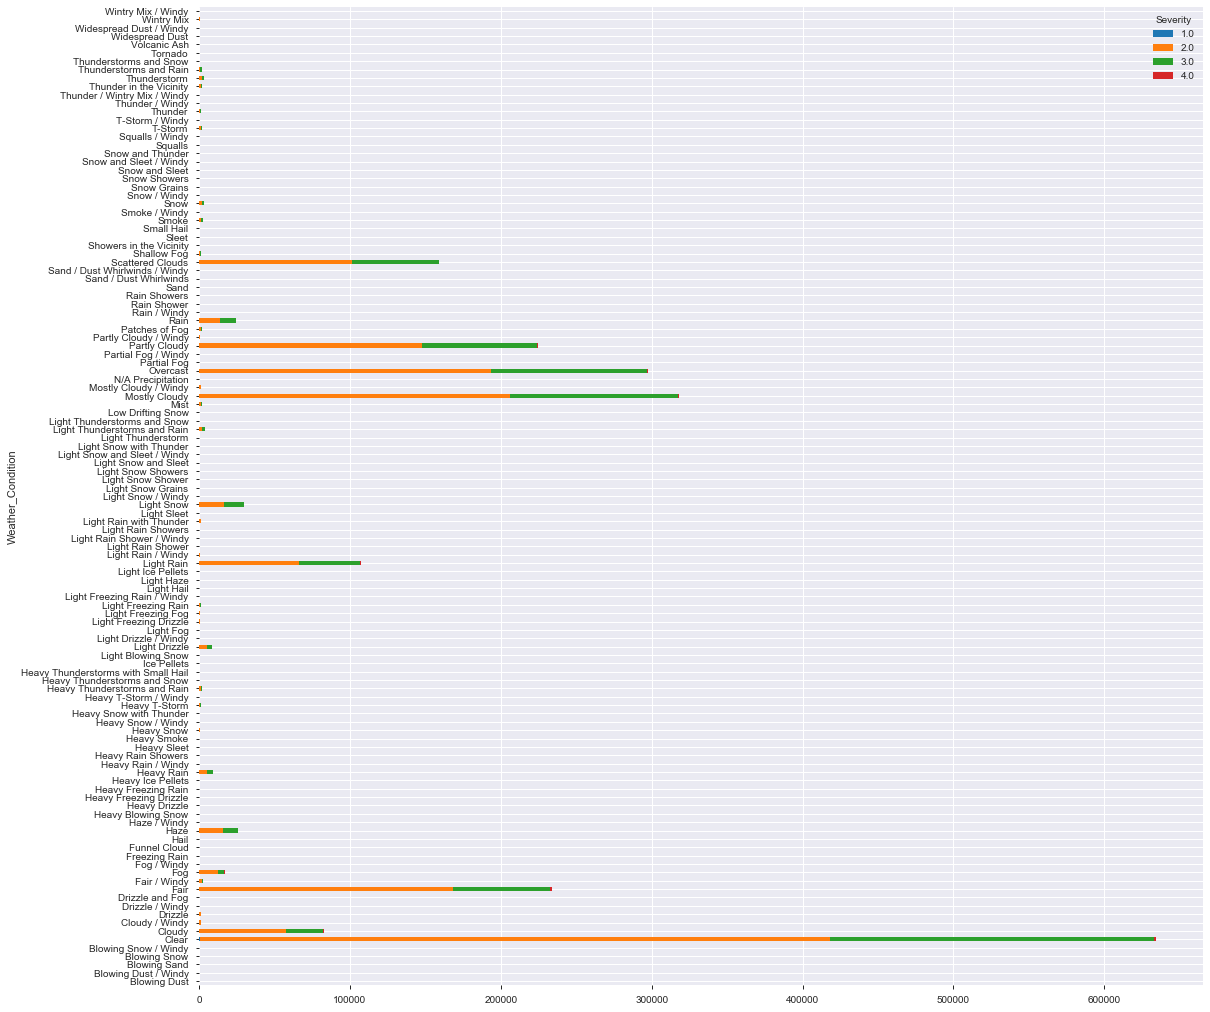

In [104]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 65em; }</style>"))

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 18]

# State and severity bar chart
df_bar = pd.crosstab(index=df['Weather_Condition'], columns=df['Severity'])

df_bar.plot(kind='barh', stacked=True)

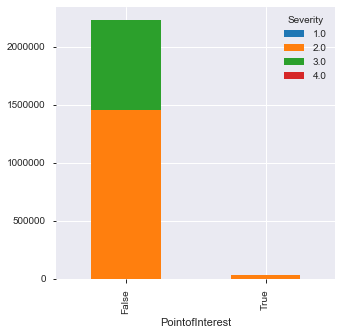

In [102]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

# POI and severity bar chart
df_bar = pd.crosstab(index=df['PointofInterest'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

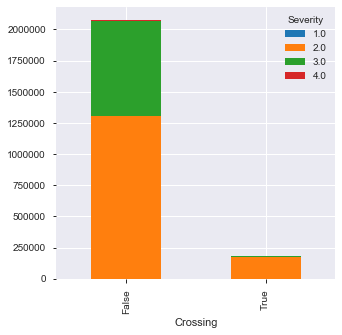

In [103]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Crossing'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

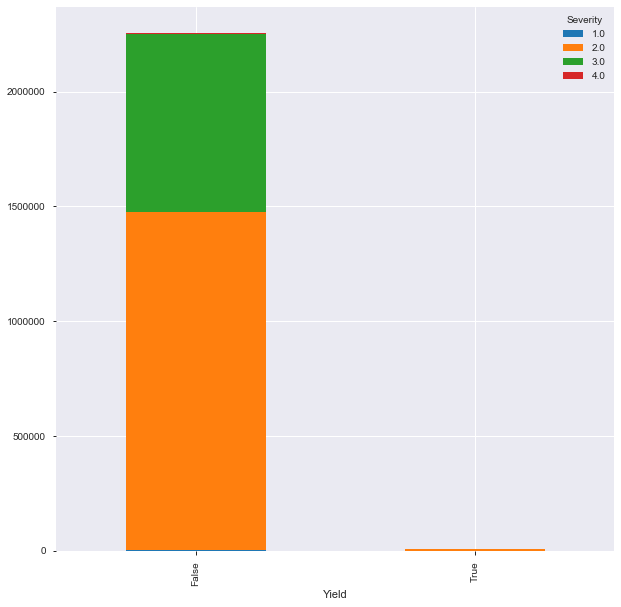

In [87]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Yield'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

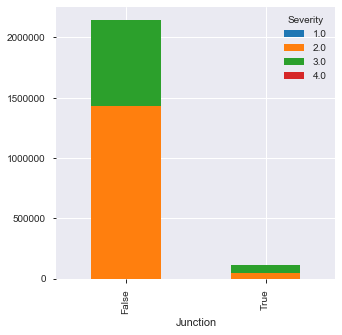

In [92]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Junction'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

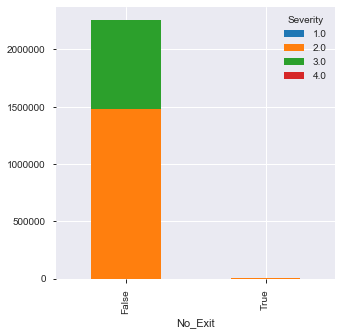

In [93]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['No_Exit'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

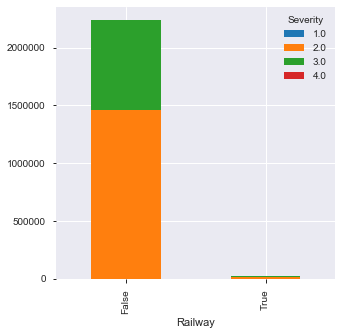

In [91]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Railway'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

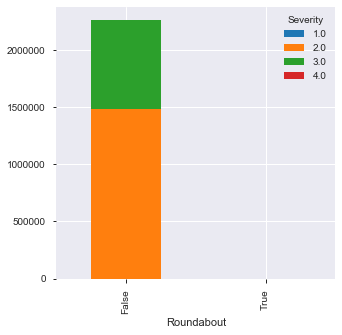

In [94]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Roundabout'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

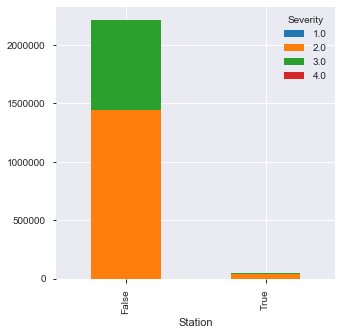

In [95]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Station'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

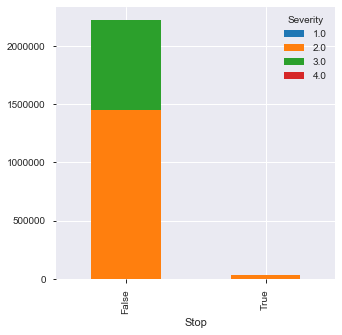

In [96]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Stop'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

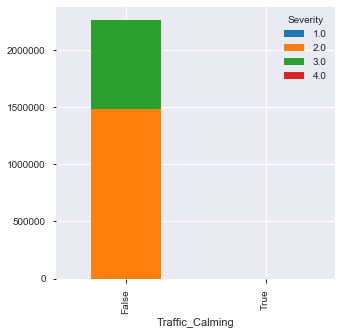

In [98]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Traffic_Calming'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

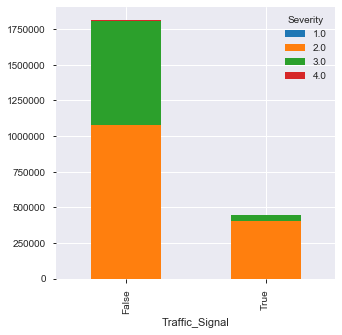

In [99]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Traffic_Signal'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

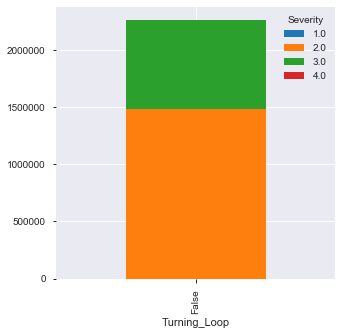

In [100]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Turning_Loop'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

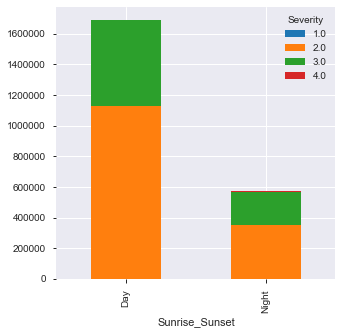

In [101]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

df_bar = pd.crosstab(index=df['Sunrise_Sunset'], columns=df['Severity'])

df_bar.plot(kind='bar', stacked=True)

,TMC,Severity,Distance(mi),Temperature(F),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
TMC,1.000000,0.170315,0.032074,0.000276,-0.000425,0.006835,-0.022244,-0.003217,-0.036879,0.022141,0.031004,-0.001705,-0.009201,-0.001900,-0.011855,-0.017259,-0.001852,-0.057323,NaN
Severity,0.170315,1.000000,0.136822,-0.033450,-0.009543,0.009223,-0.052252,-0.006331,-0.118745,-0.005312,0.062770,-0.004208,-0.022700,-0.004192,-0.043621,-0.046646,-0.007316,-0.197374,NaN
Distance(mi),0.032074,0.136822,1.000000,-0.051803,-0.014238,0.016701,-0.016981,-0.001722,-0.038112,-0.003188,0.039494,-0.003002,-0.011910,-0.001347,-0.020186,-0.008485,-0.002062,-0.068634,NaN
Temperature(F),0.000276,-0.033450,-0.051803,1.000000,0.168717,-0.050278,-0.001635,-0.000217,0.024167,0.000577,-0.004631,0.004673,0.005008,-0.000410,0.010284,-0.005362,-0.001569,0.052522,NaN
Visibility(mi),-0.000425,-0.009543,-0.014238,0.168717,1.000000,0.001902,0.005075,0.000450,0.034027,-0.001211,-0.002983,0.013411,0.002802,0.000257,0.006751,0.001615,0.000424,0.026867,NaN
Wind_Speed(mph),0.006835,0.009223,0.016701,-0.050278,0.001902,1.000000,-0.008604,-0.000465,0.001864,-0.003445,0.009554,-0.000382,-0.005340,-0.001545,-0.001839,0.005106,-0.001652,0.005391,NaN
Amenity,-0.022244,-0.052252,-0.016981,-0.001635,0.005075,-0.008604,1.000000,0.003727,0.110355,0.001028,-0.028012,0.006564,0.038894,0.000286,0.190694,0.025075,0.003727,0.100115,NaN
Bump,-0.003217,-0.006331,-0.001722,-0.000217,0.000450,-0.000465,0.003727,1.000000,0.004771,-0.000474,-0.002803,0.001070,0.000511,-0.000078,0.001762,0.012195,0.621825,-0.002498,NaN
Crossing,-0.036879,-0.118745,-0.038112,0.024167,0.034027,0.001864,0.110355,0.004771,1.000000,0.067749,-0.067727,0.052667,0.274115,-0.000768,0.082567,0.055757,0.010368,0.403208,NaN
Give_Way,0.022141,-0.005312,-0.003188,0.000577,-0.001211,-0.003445,0.001028,-0.000474,0.067749,1.000000,-0.007537,0.044911,-0.001118,-0.000347,0.000057,0.045447,0.004511,0.044548,NaN


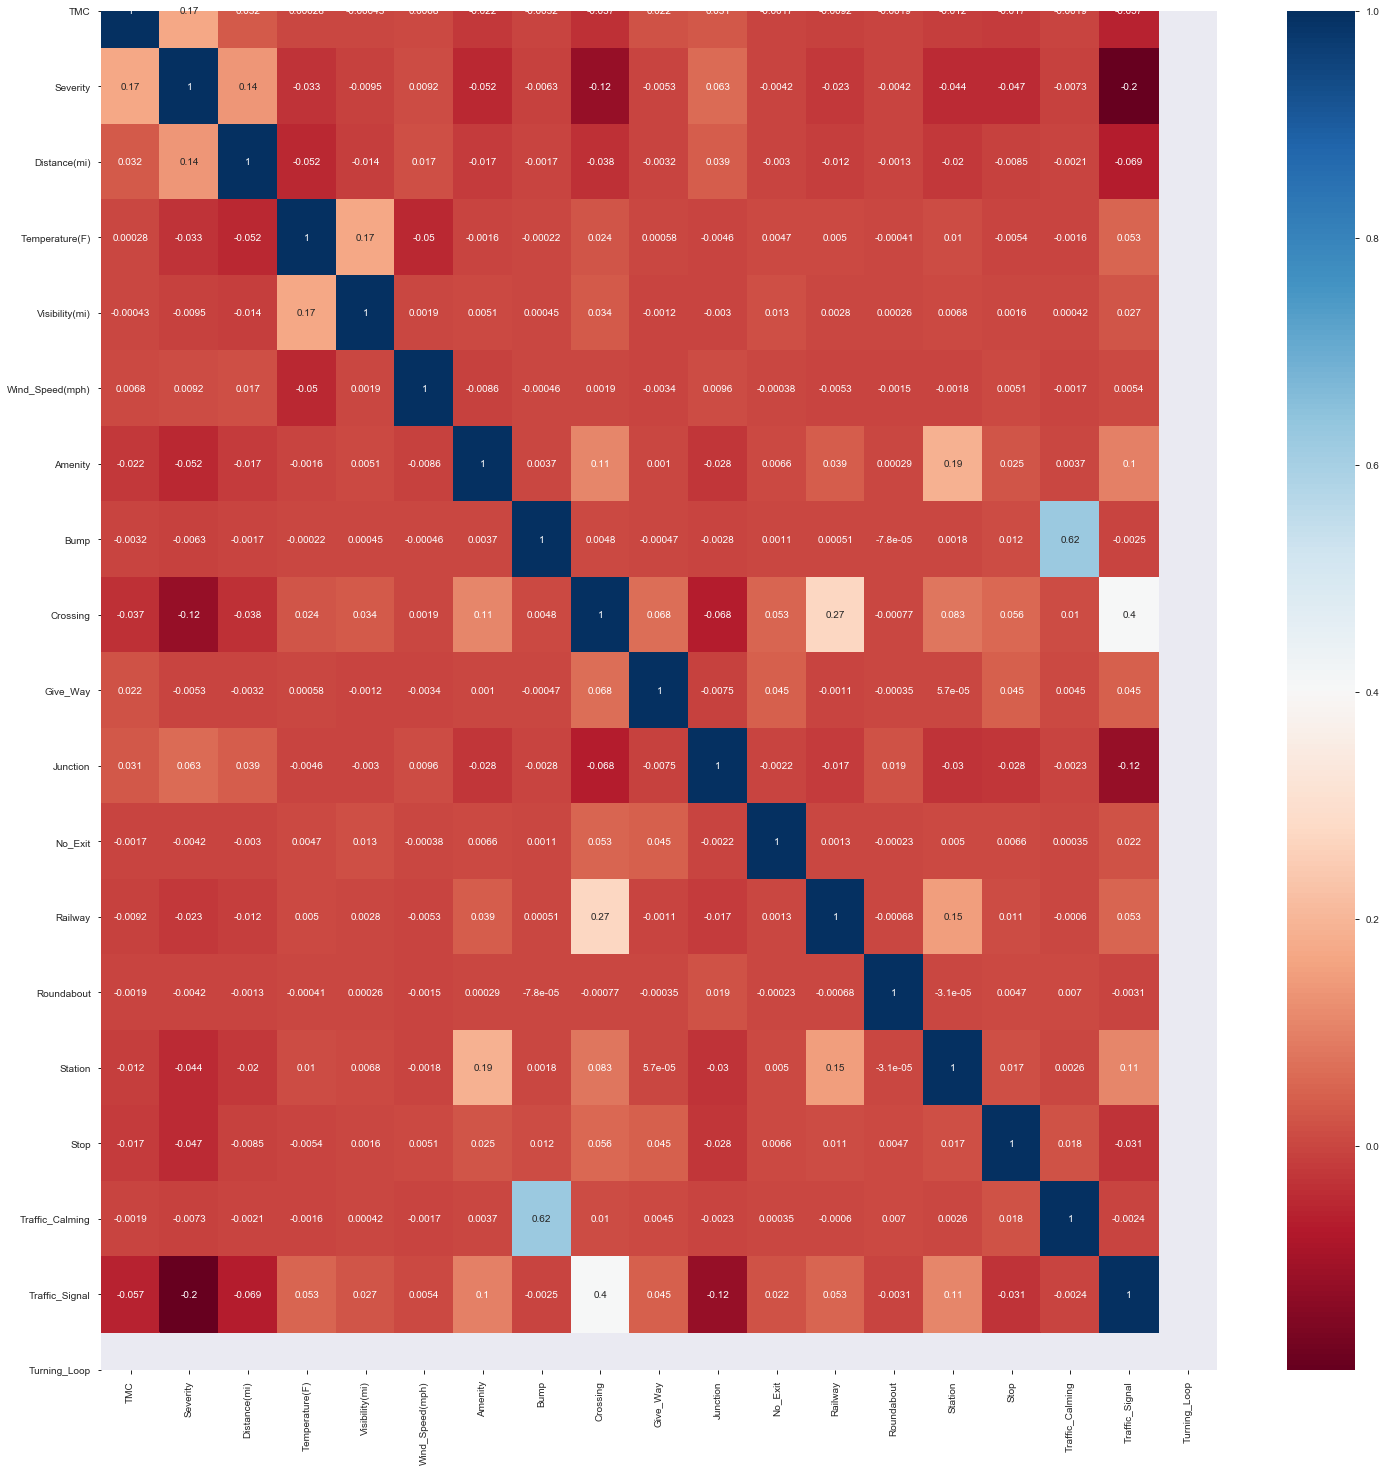

In [52]:
# Severity heatmap
plt.figure(figsize=(25,25))
c= df.corr()
sns.heatmap(c,cmap='RdBu',annot=True)
c

## Data Meaning - 10 pts

## Data Quality - 15 pts

## Sample Statistics - 10 pts

## Visualizations - 15 pts

## Attribute Relationships - 15 pts

## Relationship Exploration - 10 pts

## Other Features - 5 pts

## Exceptional Work - 10 pts